# [Data Quality Report]

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

/Users/yeunbincho/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('card transactions.csv')

In [3]:
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
97847,97848,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
97848,97849,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
97849,97850,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
97850,97851,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


# 1. Data Quality Check

## Drop any empty columns and see the data info

In [4]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (97852, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [5]:
data.tail().transpose()

,97847,97848,97849,97850,97851
Recnum,97848,97849,97850,97851,97852
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


## Add a Dummy Categorical Column

- Some Models Expect Categorical Data: Certain types of models or analysis tools work best when they have a mix of categorical and numeric data. For example, decision trees or random forests can better split data when they have a categorical variable to work with. If your dataset contains only numeric variables (like age, income, etc.), adding a dummy categorical column can help simulate this effect for the model.

- Flexibility for Preprocessing Pipelines: Sometimes, the tools or libraries you use for preprocessing data expect categorical variables for specific transformations, such as one-hot encoding or label encoding. If your dataset is entirely numeric, adding a dummy column ensures your code or pipeline doesn't break when it expects to find at least one categorical column.

- Handling Edge Cases: If you're writing general-purpose code to handle a wide range of datasets (some that might have categorical data and some that might not), adding a dummy column ensures that your code can handle all cases smoothly. For example, if your dataset is entirely numeric, but your analysis process includes steps for encoding categorical features, the dummy column makes sure everything runs smoothly without errors.

In [6]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,97852,0,1.000000
Cardnum,97852,0,1.000000
Date,97852,0,1.000000
Merchnum,94455,3397,0.965284
Merch description,97852,0,1.000000
Merch state,96649,1203,0.987706
Merch zip,93149,4703,0.951938
Transtype,97852,0,1.000000
Amount,97852,0,1.000000
Fraud,97852,0,1.000000


In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,97852.0,NaN,NaN,NaN,48926.5,28247.583608,1.0,24463.75,48926.5,73389.25,97852.0
Cardnum,97852.0,NaN,NaN,NaN,5142201749.891356,55560.78661,5142110002.0,5142152067.0,5142195612.0,5142245485.0,5142847398.0
Date,97852,365,2/28/10,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94455,13091,930090121224,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,97852,13126,GSA-FSS-ADV,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,96649,227,TN,12169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93149.0,NaN,NaN,NaN,44684.186368,28371.722354,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,97852,4,P,97497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,97852.0,NaN,NaN,NaN,425.466438,9949.850694,0.01,33.38,137.4,425.82,3102045.53
Fraud,97852.0,NaN,NaN,NaN,0.020919,0.143115,0.0,0.0,0.0,0.0,1.0


## Make best guess to automatically set numerics or categoricals

In [9]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # can adjust this upper limit depending on which data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['Cardnum','Merchnum','Merch zip']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

Recnum
Transtype
Fraud
dummy
numerics: ['Amount']

categoricals: ['Date', 'Merchnum', 'Merch description', 'Merch state', 'Transtype', 'Recnum', 'Fraud', 'Cardnum', 'Merchnum', 'Merch zip']


## Collect summary statistics for the numerical and categorical columns

- How much data is missing (through the non-null count and percentage).
- How many zeros are present (1> If there are many transactions with an amount of zero, it could indciate failed or voided transactions 2> 0 typically indicates that a transaction is non-fraudulent, If there are a large number of zeros in the Fraud column, it shows that the majority of transactions are non-fraudulent, and fraud is rare).
- Key statistical measures like min, max, mean, standard deviation, and mode.

- The reason why the 'Most Common' for 'Recnum' is '1', is each transaction has a distinct value so it simply returns the first value it sees in a unique field when all values appear once ('mode' function was adjusted here)

In [10]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [11]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Amount,numeric,97852,100.0%,0,0.01,3102045.53,425.466438,9949.8,3.62


In [12]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Date,categorical,97852,100.0%,0,365,2/28/10
1,Merchnum,categorical,94455,96.5%,0,13091,930090121224
2,Merch description,categorical,97852,100.0%,0,13126,GSA-FSS-ADV
3,Merch state,categorical,96649,98.8%,0,227,TN
4,Transtype,categorical,97852,100.0%,0,4,P
5,Recnum,categorical,97852,100.0%,0,97852,1
6,Fraud,categorical,97852,100.0%,95805,2,0
7,Cardnum,categorical,97852,100.0%,0,1645,5142148452
8,Merchnum,categorical,94455,96.5%,0,13091,930090121224
9,Merch zip,categorical,93149,95.2%,0,4567,38118.0


# 2. Visualizations

### Codes for all the fields

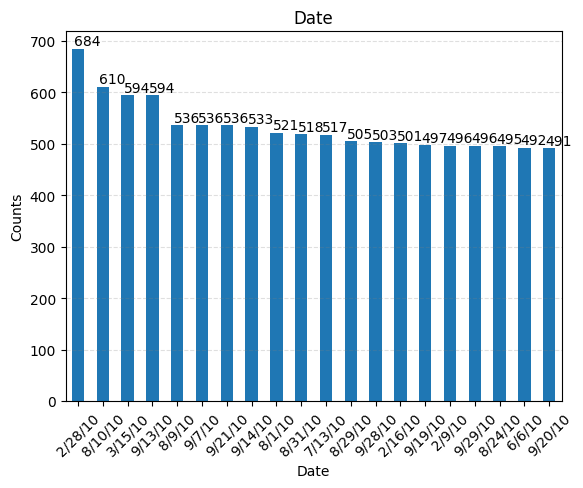

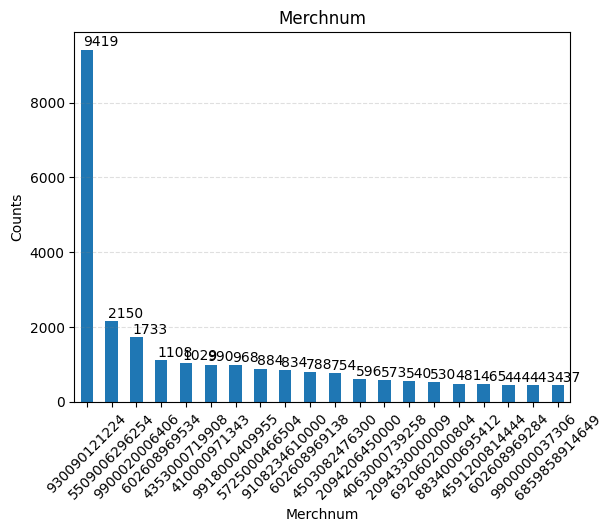

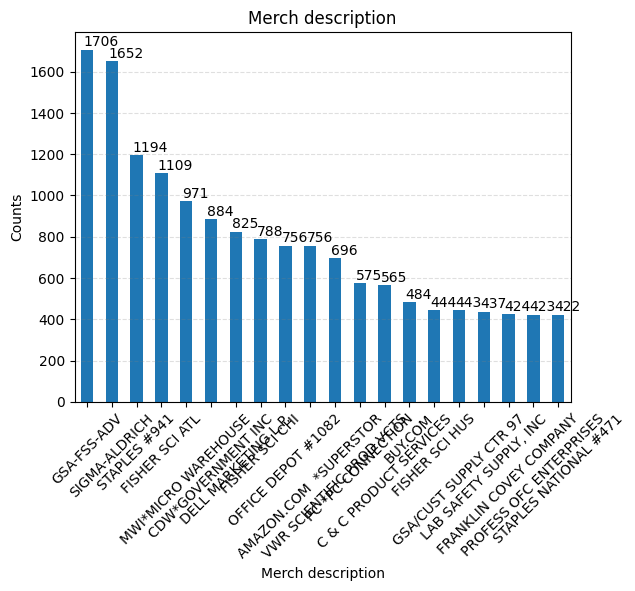

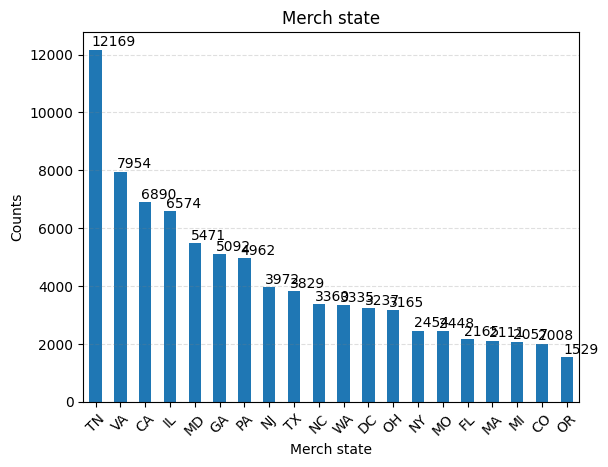

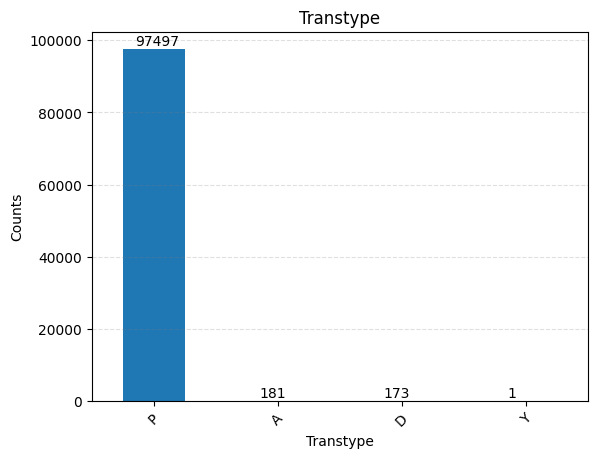

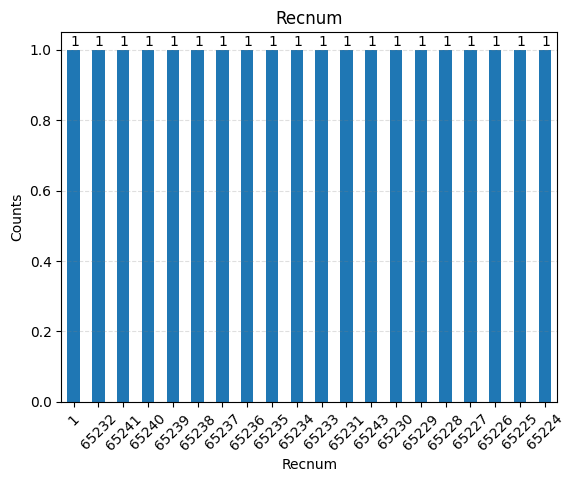

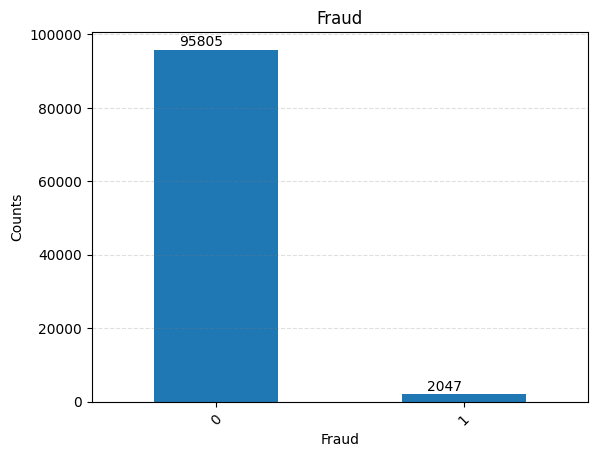

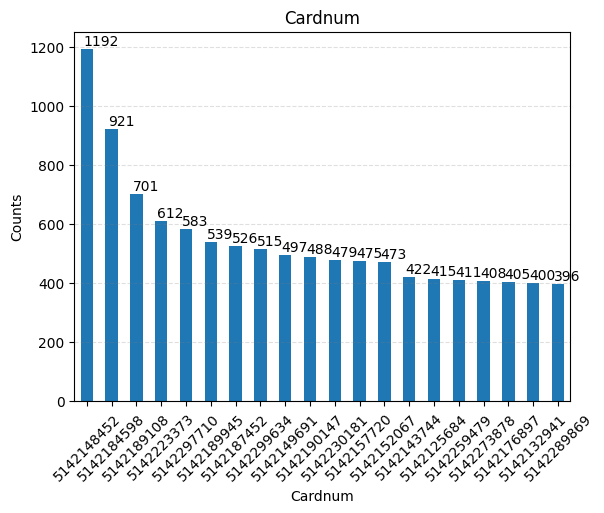

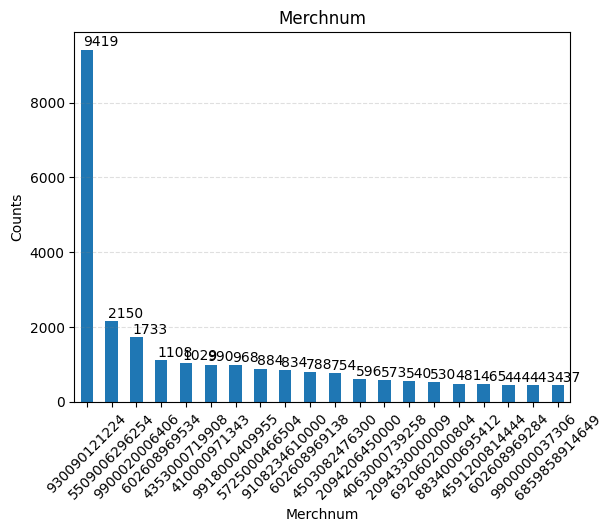

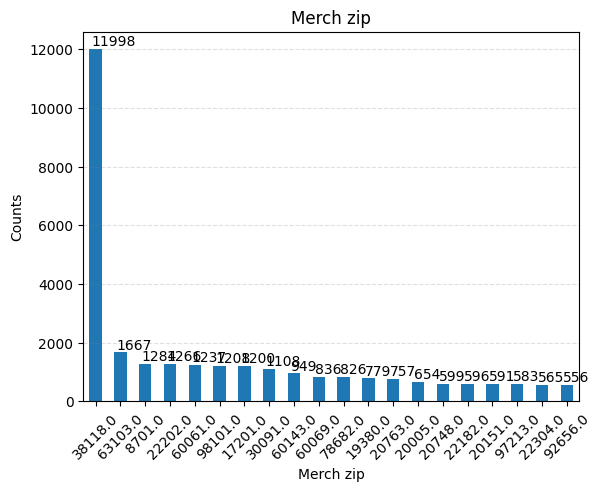

In [13]:
for col in categoricals:
    counts = data[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    plt.xticks(rotation=45)
    for i, v in enumerate(counts):
        ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

## 1. Amount

- Plot the distributions of the numeric columns using histograms

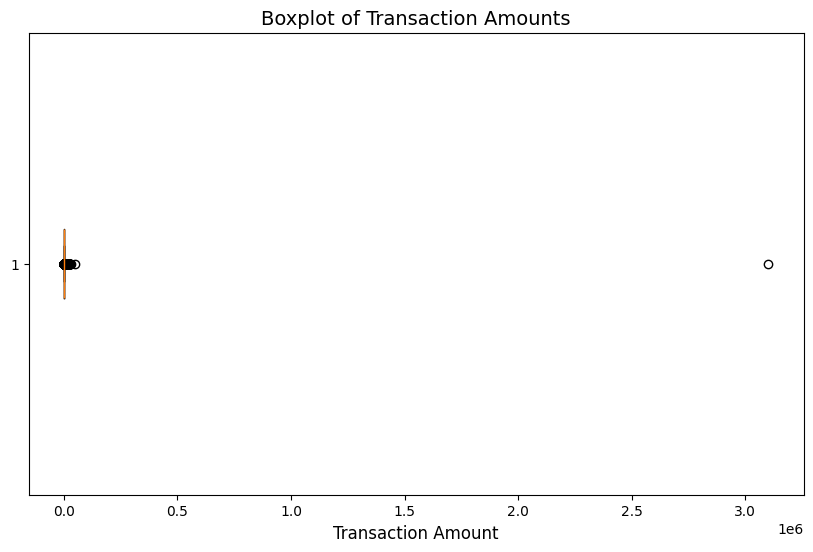

In [14]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Amount' field
plt.figure(figsize=(10,6))

# Boxplot for 'Amount' field
plt.boxplot(data['Amount'], vert=False)

# Adding titles and labels
plt.title('Boxplot of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)

# Display the plot
plt.show()

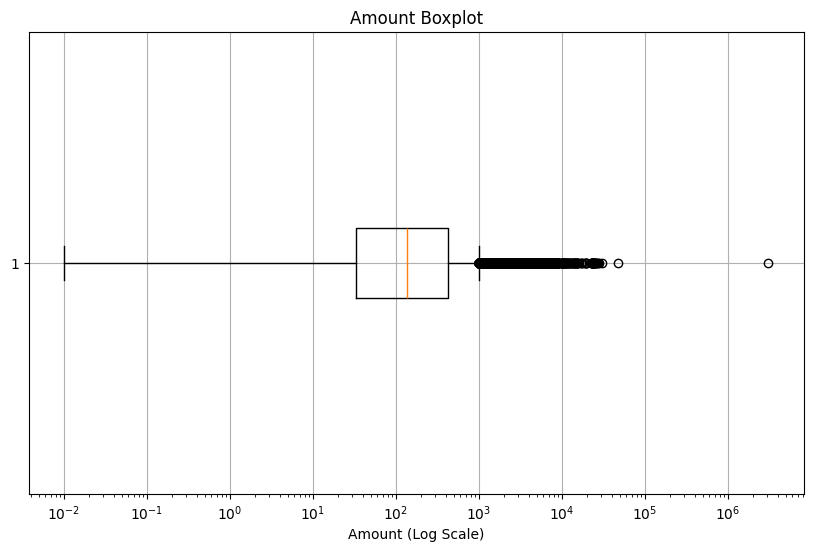

<Figure size 640x480 with 0 Axes>

In [15]:
# Creating a boxplot for the 'Amount' field with x-axis in log scale
plt.figure(figsize=(10, 6))

# Plotting the boxplot
plt.boxplot(data['Amount'], vert=False)

# Setting the x-axis to log scale
plt.xscale('log')

# Setting the title and labels
plt.title('Amount Boxplot')
plt.xlabel('Amount (Log Scale)')

# Display the plot
plt.grid(True)
plt.show()

# Save the plot as a PNG file
plt.savefig('amount boxplot (outliers).png')

# Display the plot
plt.show()

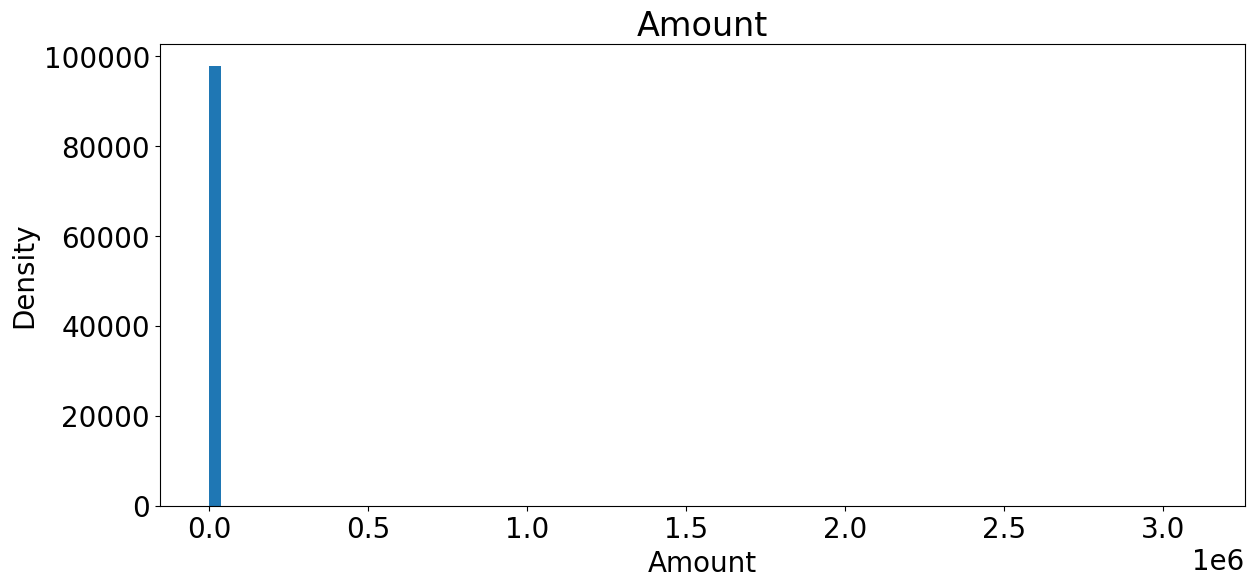

In [16]:
# plot numerics distributions if desired
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})
for col in numerics:
    plt.hist(data[col],bins=80)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(col)
    plt.show()

### 1.1. Amount: Identifying Outliers

Why Choose (99%) Percentiles Over IQR?

The code is specifically focused on identifying the top 1% of extreme values in the data. The 99th percentile method only looks at extreme values at the high end of the distribution (the top 1%). This is especially useful when you're only concerned with large outliers and don’t need to capture both tails of the distribution (as in the case of fraud detection, where high-value transactions may be suspicious).

- IQR: Ideal for symmetric or less skewed data, capturing both high and low outliers.
- 99th Percentile: Effective for identifying the topmost extreme values, particularly useful when focusing on high-value anomalies in skewed data.

In [17]:
# Calculate the 99th percentile (to identify the top 1% of extreme outliers)
threshold_99 = data['Amount'].quantile(0.99)

# Filter the data to show only the top 1% of extreme outliers
extreme_outliers = data[data['Amount'] > threshold_99]

# Display the top 1% of extreme outliers
print(extreme_outliers)

# Optionally, show the number of extreme outliers and their percentage
percentage_extreme_outliers = (len(extreme_outliers) / len(data)) * 100
print(f"Top 1% Extreme Outliers: {len(extreme_outliers)} records")
print(f"Percentage of extreme outliers: {percentage_extreme_outliers:.2f}%")

       Recnum     Cardnum      Date       Merchnum          Merch description  \
99        100  5142121593    1/3/10  4591200814444        DELL MARKETING L.P.   
159       160  5142182016    1/3/10  7965600643306          ACCUSTANDARD, INC   
175       176  5142127276    1/3/10            NaN   CONVENIENCE CHECK FEE(%)   
335       336  5142189945    1/4/10  8834000695412                    BUY.COM   
578       579  5142139554    1/5/10  8000316494212     EXEC REPORTING SERVICE   
...       ...         ...       ...            ...                        ...   
97292   97293  5142183210  12/28/10  6098208200062      MIAMI COMPUTER SUPPLY   
97296   97297  5142189945  12/28/10  2036100687150      GE REUTER-STOKES, INC   
97462   97463  5142189945  12/29/10   188700635059  PACKARD INSTRUMENT CO INC   
97504   97505  5142153880  12/29/10  8849060059968   DIVERSIFIED CONTROL SYST   
97520   97521  5142243247  12/29/10  9108347680000      STAPLES NATIONAL #471   

      Merch state  Merch zi

### 1.2. Amount: Visualization tips

What Does histtype='stepfilled' Do?
- 'stepfilled': This style creates a filled-in, stepped outline of the histogram bars. Instead of traditional solid bars, the bars are outlined with a "step" or "line" and filled with color.

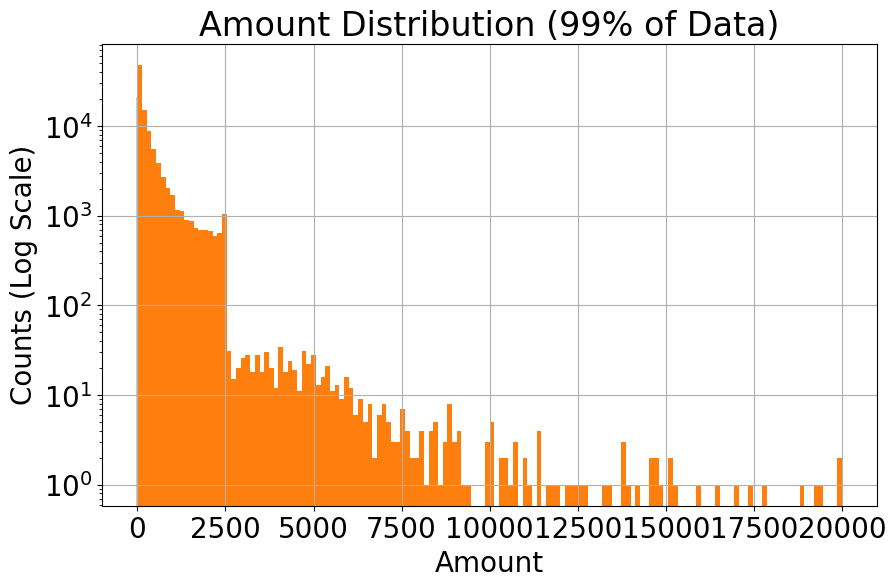

<Figure size 1400x600 with 0 Axes>

In [18]:
# To incorporate 99% of the data, I'll remove the top 1% of the highest amounts
amount_99 = data['Amount'].quantile(0.99)

# Filtering the data to only use the bottom 99% of 'Amount' values
filtered_data = data[data['Amount'] <= amount_99]

# Plotting the distribution with 99% of the data and adjusting bins
plt.figure(figsize=(10,6))

# Plotting the 'Amount' distribution with 150 bins and log scale on y-axis
plt.hist(filtered_data['Amount'], bins=100, edgecolor='black', log=True)
plt.hist(data['Amount'], bins = 150, range = (0, 20000), histtype='stepfilled')

# Setting title and axis labels
plt.title('Amount Distribution (99% of Data)')
plt.xlabel('Amount')
plt.ylabel('Counts (Log Scale)')
plt.grid(True)

# Display the plot
plt.show()

# Save the plot as a PNG file
plt.savefig('amount_distribution_99percent.png')

# Display the plot
plt.show()

## 2. Date

In [19]:
# Check for missing or invalid dates
print(data['Date'].isnull().sum())  # Check for missing dates

0


In [20]:
print(data[data['Date'] < '2010-01-01'])  # Check for any dates before 2010

       Recnum     Cardnum      Date       Merchnum        Merch description  \
0           1  5142190439    1/1/10  5509006296254   FEDEX SHP 12/23/09 AB#   
1           2  5142183973    1/1/10    61003026333  SERVICE MERCHANDISE #81   
2           3  5142131721    1/1/10  4503082993600        OFFICE DEPOT #191   
3           4  5142148452    1/1/10  5509006296254   FEDEX SHP 12/28/09 AB#   
4           5  5142190439    1/1/10  5509006296254   FEDEX SHP 12/23/09 AB#   
...       ...         ...       ...            ...                      ...   
97847   97848  5142276053  12/31/10  3500000006160   BEST BUY      00001610   
97848   97849  5142225701  12/31/10  8090710030950   MARKUS OFFICE SUPPLIES   
97849   97850  5142226486  12/31/10  4503057341100            TECH PAC, INC   
97850   97851  5142244619  12/31/10  8834000695412                  BUY.COM   
97851   97852  5142243247  12/31/10  9108347680006    STAPLES NATIONAL #471   

      Merch state  Merch zip Transtype   Amount  Fr

In [21]:
# Filtering data for the year 2010
data_2010 = data[(data['Date'] >= '2010-01-01') & (data['Date'] <= '2010-12-31')]

# Check if any data is left out due to incorrect date formats
print(data_2010['Date'].min(), data_2010['Date'].max())

nan nan


/var/folders/ph/5sdql_490g756sgnpn1yfg200000gn/T/ipykernel_34832/3487903811.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
/var/folders/ph/5sdql_490g756sgnpn1yfg200000gn/T/ipykernel_34832/3487903811.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_names = pd.date_range(start='2010-01-01', end='2010-12-31', freq='M').strftime('%b')
/var/folders/ph/5sdql_490g756sgnpn1yfg200000gn/T/ipykernel_34832/3487903811.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start='2010-01-01', end='2010-12-31', freq='M'), labels=month_names, rotation=45)


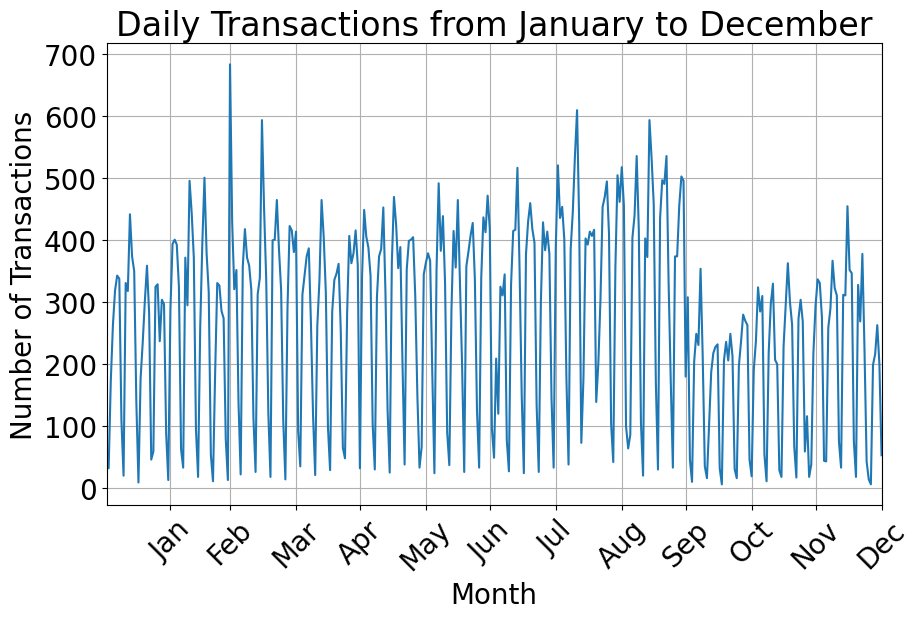

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' field is in datetime format, if not, convert it
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Group the data by date for daily transactions
daily_transactions = data.groupby(data['Date'].dt.date).size()

# Replotting the line graph with customized x-axis to show only the month names without year and day
plt.figure(figsize=(10,6))

# Plotting the daily transactions
daily_transactions.plot(kind='line')

# Setting title and axis labels
plt.title('Daily Transactions from January to December')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Formatting the x-axis to show only month names (e.g., 'Jan', 'Feb', etc.)
month_names = pd.date_range(start='2010-01-01', end='2010-12-31', freq='M').strftime('%b')

# Setting x-axis limits to start at January and end at December
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

# Setting ticks and labels to match the months without including the year and day
plt.xticks(pd.date_range(start='2010-01-01', end='2010-12-31', freq='M'), labels=month_names, rotation=45)

# Display the plot
plt.show()

## 3. Merchant Number

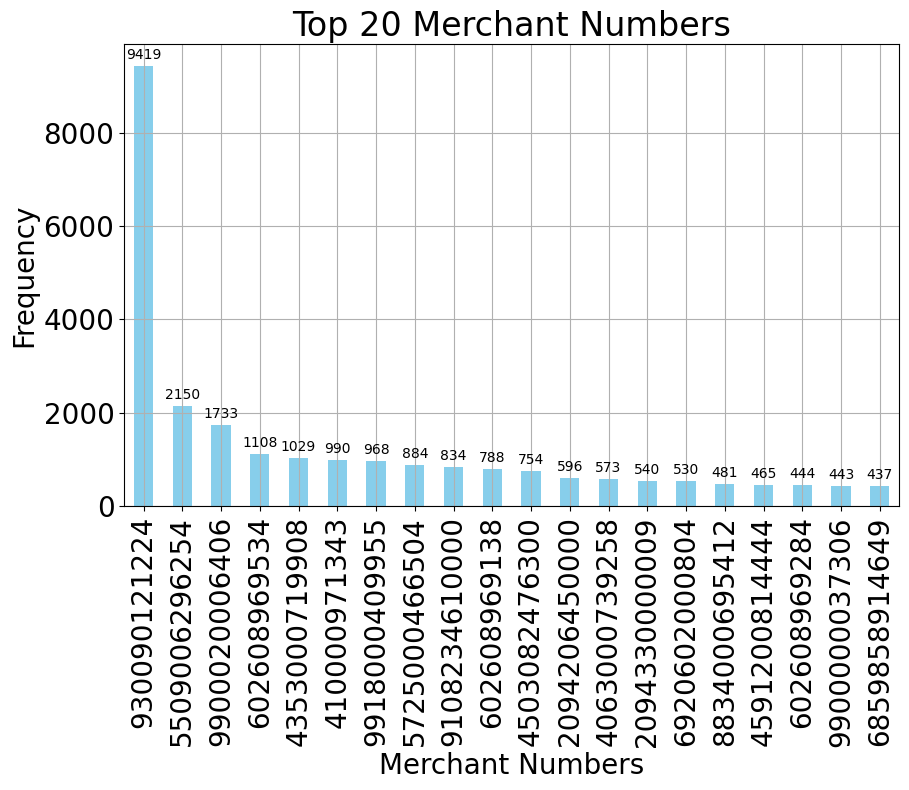

In [23]:
# Checking the top 20 values in 'Merch description' field
top_20_merch_num = data['Merchnum'].value_counts().head(20)

# Plotting a bar chart for the top 20 'Merch description' values
plt.figure(figsize=(10,6))
bars = top_20_merch_num.plot(kind='bar', color='skyblue')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Top 20 Merchant Numbers')
plt.xlabel('Merchant Numbers')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

### 3.1. Trying to identify the merch description for the top merchant number
- This 'Merchnum' 93009012124 has missing value for the merch description

In [24]:
# Retrieve the merchant description for 'Merchnum' 93009012124
merchant_description = data.loc[data['Merchnum'] == '93009012124', 'Merch description'].unique()

# Display the merchant description
print(merchant_description)

[]


In [25]:
# Check if there are missing values in the 'Merch description' field for this merchant number
missing_description = data[data['Merchnum'] == '93009012124']['Merch description'].isnull().sum()
print(f"Missing descriptions for '93009012124': {missing_description}")

Missing descriptions for '93009012124': 0


In [26]:
# Check for empty strings or descriptions with only spaces
description_values = data[data['Merchnum'] == '93009012124']['Merch description'].unique()

# Display descriptions, even if they contain only spaces
print(f"Merchant descriptions for '93009012124': {description_values}")

Merchant descriptions for '93009012124': []


## 4. Merchant Description

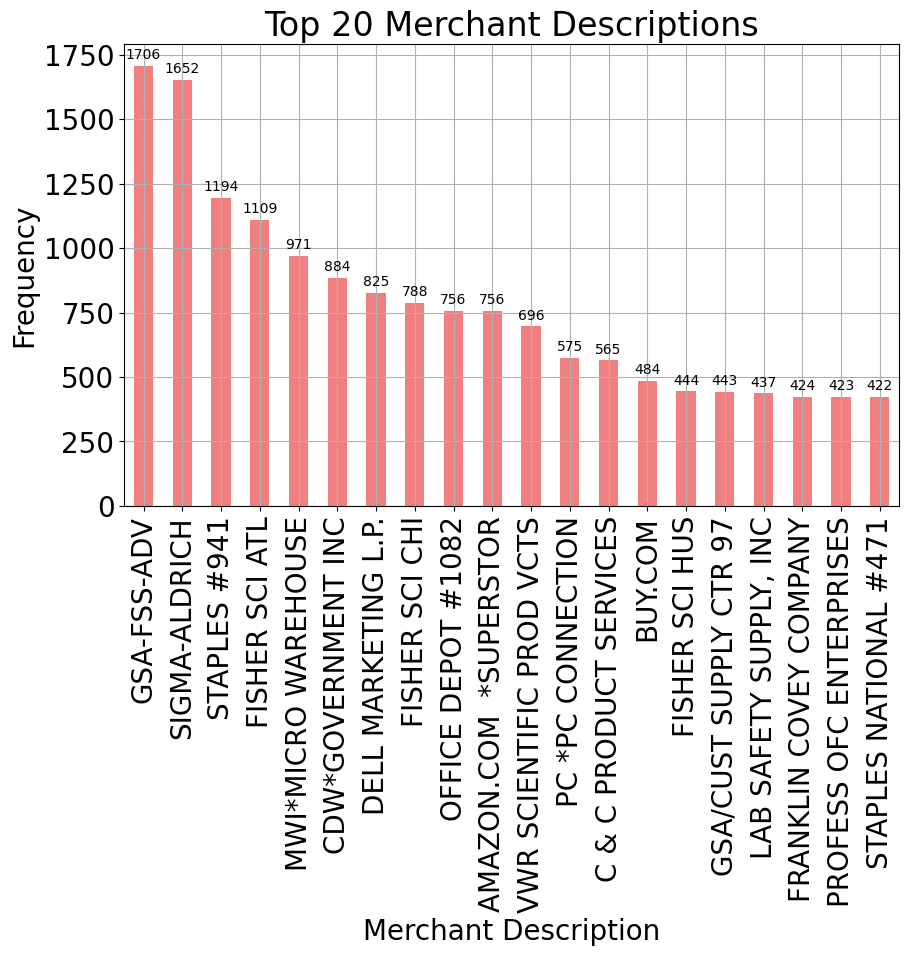

In [27]:
# Checking the top 20 values in 'Merch description' field
top_20_merch_description = data['Merch description'].value_counts().head(20)

# Plotting a bar chart for the top 20 'Merch description' values
plt.figure(figsize=(10,6))
bars = top_20_merch_description.plot(kind='bar', color='lightcoral')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Top 20 Merchant Descriptions')
plt.xlabel('Merchant Description')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

## 5. Merchant State

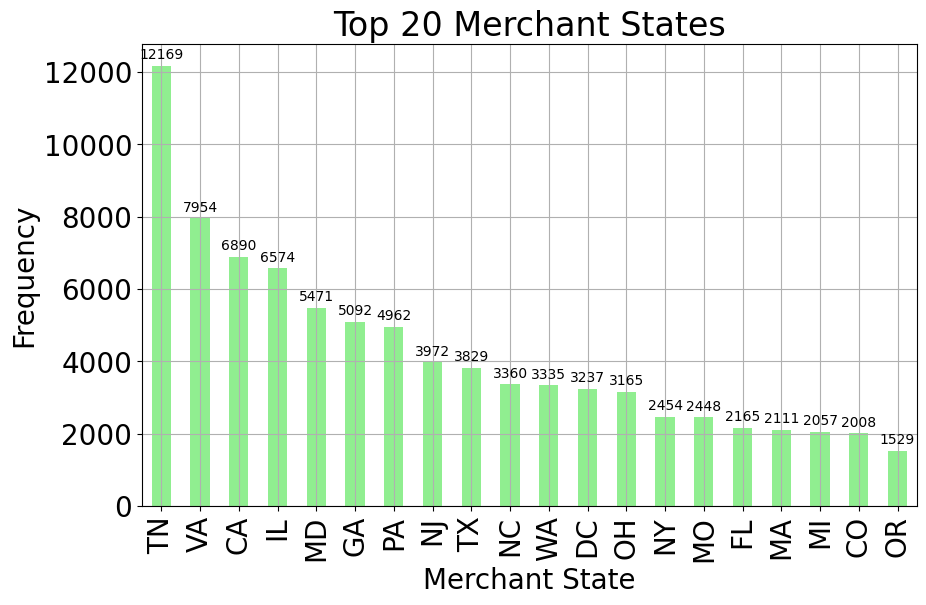

In [28]:
# Checking the top 20 values in 'Merch state' field
top_20_merch_state = data['Merch state'].value_counts().head(20)

# Plotting a bar chart for the top 20 'Merch state' values
plt.figure(figsize=(10,6))
bars = top_20_merch_state.plot(kind='bar', color='lightgreen')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Top 20 Merchant States')
plt.xlabel('Merchant State')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

## 6. Transaction Type

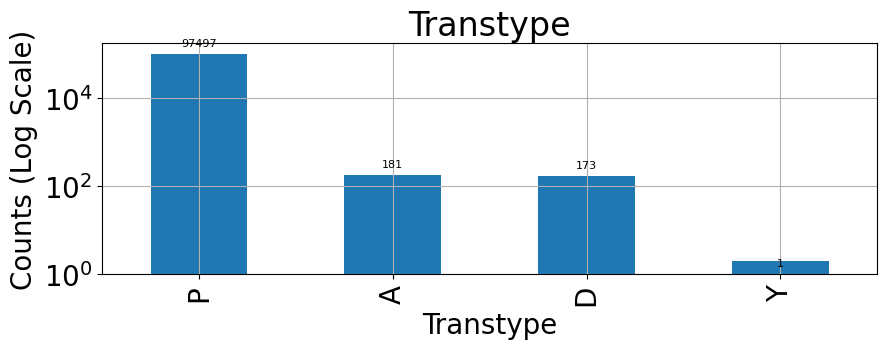

In [29]:
# Plotting a bar chart for 'Transtype' like the image

# Checking the distribution of 'Transtype' field
transtype_distribution = data['Transtype'].value_counts()

# Plotting the bar chart with log scale on the y-axis
plt.figure(figsize=(10,3))
bars = transtype_distribution.plot(kind='bar', log=True)

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=8, xytext=(0, 8),
                  textcoords='offset points')

# Setting title and labels
plt.title('Transtype')
plt.xlabel('Transtype')
plt.ylabel('Counts (Log Scale)')
plt.grid(True)

# Display the plot
plt.show()

## 7. Fraud Distribution

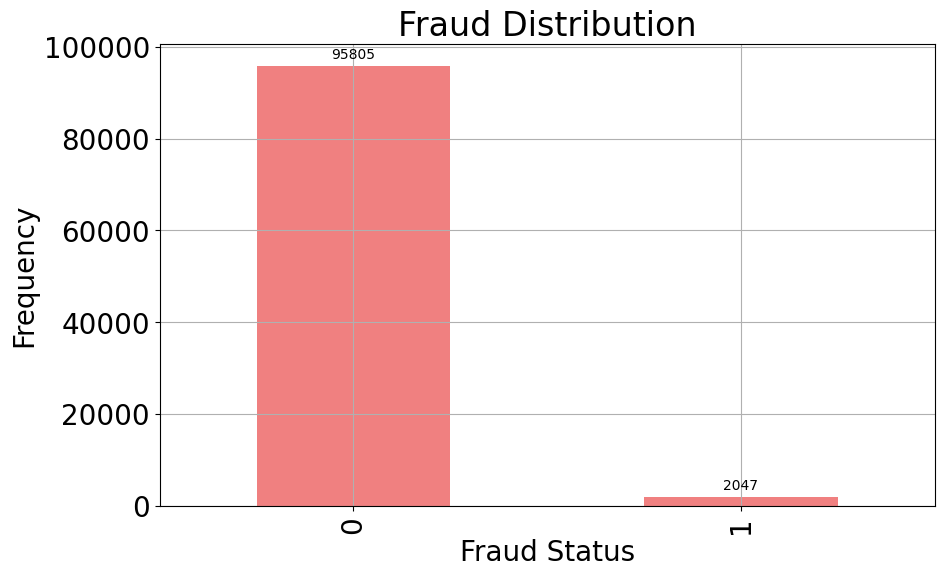

In [30]:
# Checking the distribution of 'Fraud' field
fraud_distribution = data['Fraud'].value_counts()

# Plotting a bar chart for 'Fraud' values
plt.figure(figsize=(10,6))
bars = fraud_distribution.plot(kind='bar', color='lightcoral')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Fraud Distribution')
plt.xlabel('Fraud Status')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

## 8. Card Numbers

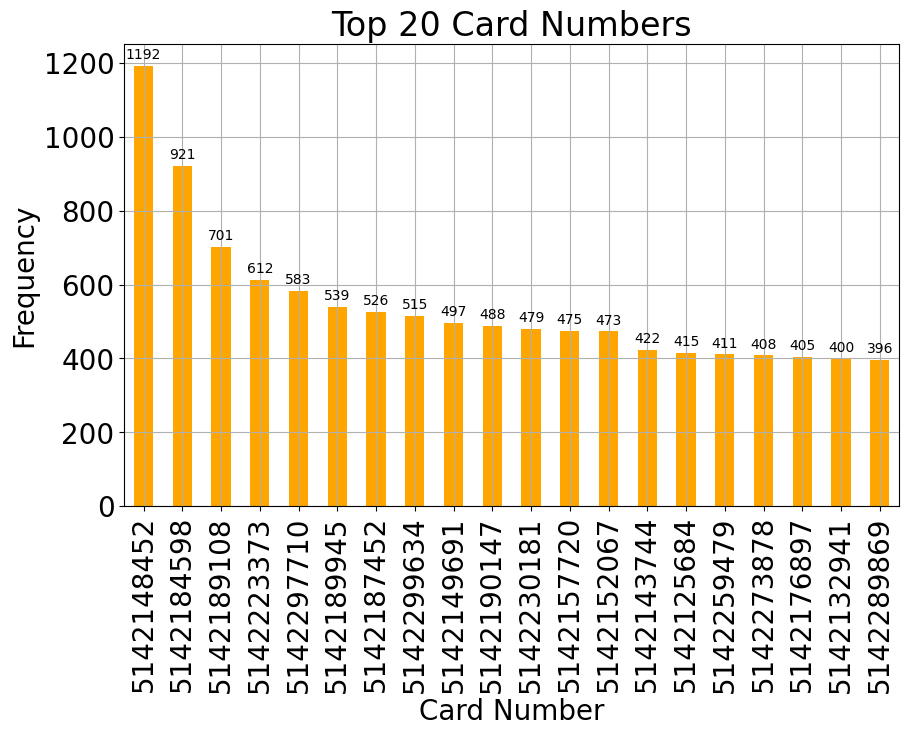

In [31]:
# Checking the top 20 values in 'Cardnum' field
top_20_cardnum = data['Cardnum'].value_counts().head(20)

# Plotting a bar chart for the top 20 'Cardnum' values
plt.figure(figsize=(10,6))
bars = top_20_cardnum.plot(kind='bar', color='orange')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Top 20 Card Numbers')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

## 9. Merchant Zipcodes

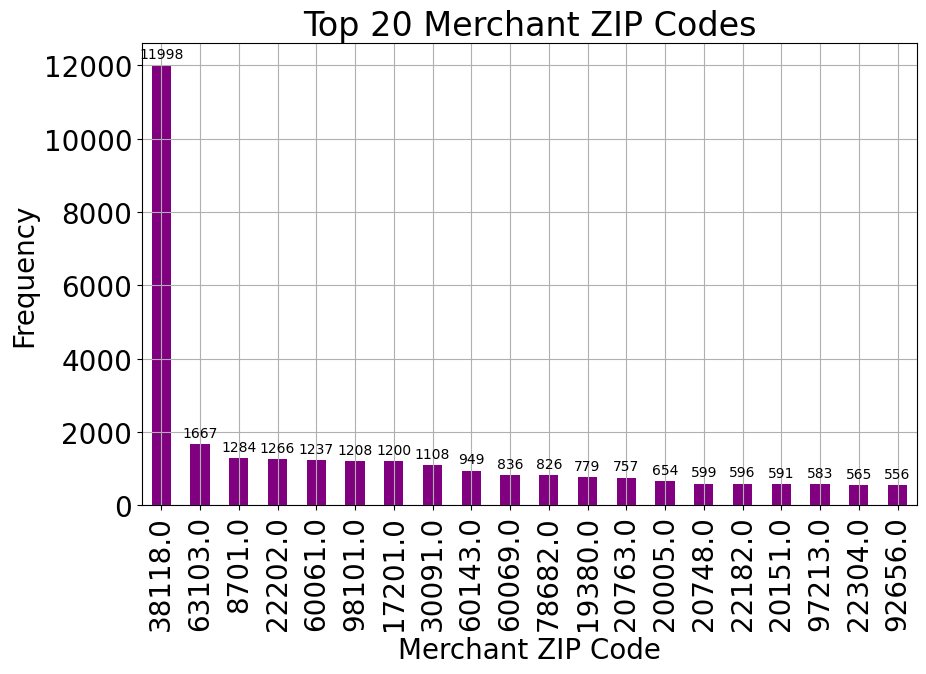

In [32]:
# Checking the top 20 values in 'Merch zip' field
top_20_merch_zip = data['Merch zip'].value_counts().head(20)

# Plotting a bar chart for the top 20 'Merch zip' values
plt.figure(figsize=(10,6))
bars = top_20_merch_zip.plot(kind='bar', color='purple')

# Adding labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Setting the title and labels
plt.title('Top 20 Merchant ZIP Codes')
plt.xlabel('Merchant ZIP Code')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()